<a href="https://colab.research.google.com/github/IronZiiz/data-science_Visualization/blob/main/HW_Viz_subplots_trend_sales_store_IMPROVE_VIZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# make a Df

lojas = ['A', 'B', 'C', 'D']

vendas_2022 = {'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}


In [3]:
dados_dict = {'Lojas': lojas}
dados_dict.update(vendas_2022)


In [4]:
df = pd.DataFrame(dados_dict)

In [5]:
df.head()

,Lojas,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,A,100,120,150,180,220,230,250,260,240,220,400,300
1,B,80,90,100,110,190,150,170,180,160,140,220,350
2,C,150,170,200,230,350,280,300,310,290,270,350,400
3,D,50,60,80,90,200,120,140,150,130,110,190,250


In [6]:
df = df.set_index('Lojas')
df.head()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Lojas,,,,,,,,,,,,
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


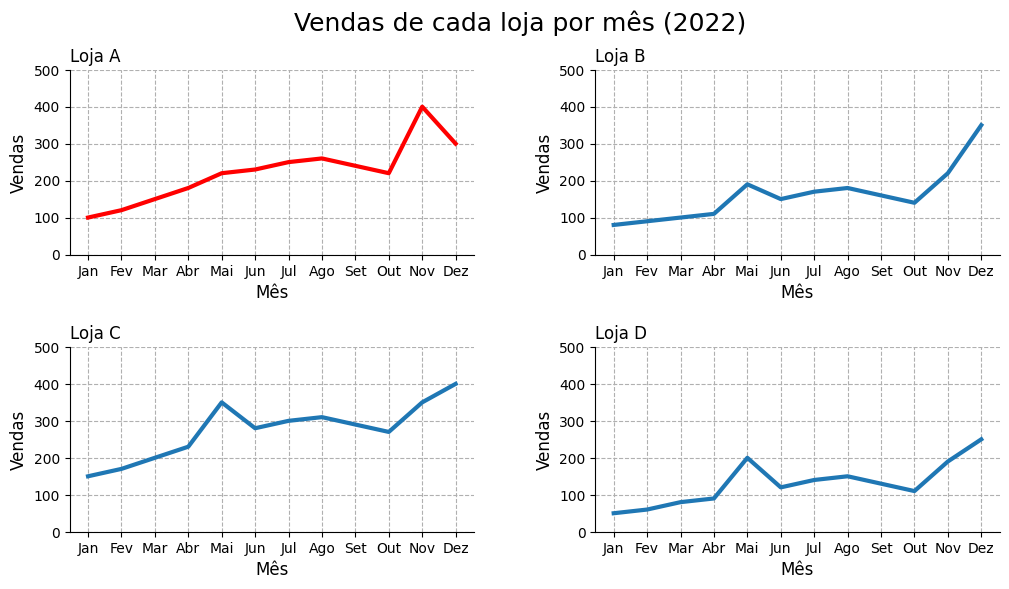

In [7]:
fig, axs = plt.subplots(2,2, figsize = (12, 6))
fig.subplots_adjust(hspace=0.5 , wspace=0.3)
fig.suptitle('Vendas de cada loja por mês (2022)',fontsize = 18)

axs[0, 0].plot(df.loc['A', 'Jan':'Dez'], lw = 3, color = "r")
axs[0, 0].set_title( 'Loja A',loc = "left")



axs[0, 1].plot(df.loc['B', 'Jan':'Dez'], lw = 3)
axs[0, 1].set_title('Loja B',loc = "left")


axs[1, 0].plot(df.loc['C', 'Jan':'Dez'], lw = 3)
axs[1, 0].set_title('Loja C',loc = "left")


axs[1, 1].plot(df.loc['D', 'Jan':'Dez'], lw = 3)
axs[1, 1].set_title('Loja D',loc = "left")

# adjust scales
ymin = 0
ymax = 500

for ax in axs.flat:
    ax.set_xlabel('Mês', fontsize = 12)
    ax.set_ylabel('Vendas', fontsize = 12)
    ax.set(ylim=(ymin, ymax))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linestyle = '--')

plt.show()

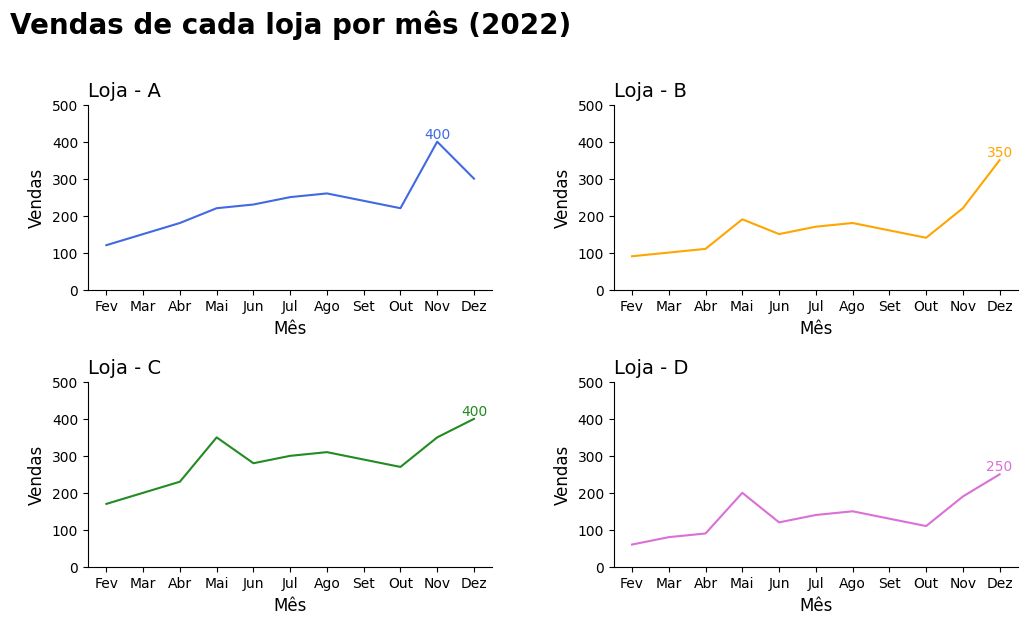

In [10]:
fig, axs = plt.subplots(2,2, figsize = (12, 6))
fig.subplots_adjust(hspace=0.5 , wspace=0.3)
fig.text(0.06, 1, 'Vendas de cada loja por mês (2022)', fontsize=20, ha='left', weight = 'bold')

# adjust scales
ymin = 0
ymax = 500

meses = df.columns[1:]
# Transformando a lista de cores em um iterador
cores = iter(['royalblue', 'orange', 'forestgreen', 'orchid', 'purple',
              'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato'])

# Iterando sobre os subplots e as lojas
for ax, (index, row) in zip(axs.flat, df.iterrows()):
    loja = index                              # Nome da loja
    vendas = row[meses].values                        # Seleciona os dados de vendas para os meses
    color = next(cores)                               # Obtém a próxima cor do iterador
    ax.plot(meses, vendas, color=color)  # Plota os dados com a cor selecionada
    ax.set_title(f'Loja - {loja}', fontsize=14, loc = 'left')
    ax.set_xlabel('Mês', fontsize=12)
    ax.set_ylabel('Vendas', fontsize=12)
    ax.set(ylim=(ymin, ymax))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Adiciona o maior valor ao gráfico
    max_vendas = vendas.max()                         # Calcula o maior valor
    max_index = vendas.argmax()                       # Encontra o índice correspondente ao maior valor
    ax.text(meses[max_index], max_vendas + 10,        # Posição do texto (mês e valor acima do ponto)
            f'{max_vendas:.0f}', color=color, fontsize=10, ha='center')

plt.show()